In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import pipeline1 as pi
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
gentab,gendict,species = pi.readcods()
gene,val,val1,_,_ = pi.prepro(gentab)

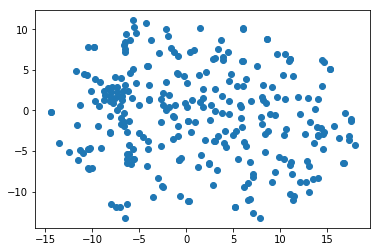

In [15]:
plt.scatter(val[:,0],val[:,1])

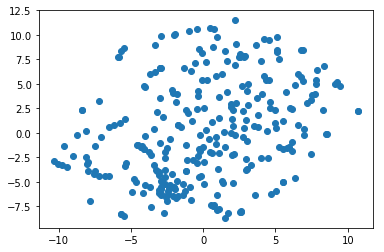

In [16]:
plt.scatter(val1[:,0],val1[:,1])

In [12]:
from bokeh.plotting import *
from bokeh.models import HoverTool
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [31]:
pi.bokeplot(val1,species)